# Introduction to the Paper Data Colliery Validation


#### Further References:

-https://bitbucket.org/proslabteam/colliery_validation/src/master/


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pm4py

#### 1. Import the Event from Single and Collaboration. Inspect Artificial 1


In [3]:
# Load the event log, same for party c
df_log_a = pm4py.read_xes(
    "/workspaces/university-petri-nets/backend/data_catalog/colliery_validation/artificial1/PartyA.xes",
)
display(df_log_a.head(5))

parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

,org:group,concept:name,time:timestamp,case:concept:name,case:Data Objects,msgInstanceId,msgType,msgFlow
0,PartyA,Activity A,2021-06-23 10:53:54.884000+00:00,case_156,None,NaN,NaN,NaN
1,PartyA,Activity D,2021-06-23 10:54:18.762000+00:00,case_156,None,m1_104,receive,m1
2,PartyA,Activity C,2021-06-23 10:54:29.808000+00:00,case_156,None,m2_105,receive,m2
3,PartyA,Activity B,2021-06-23 10:54:31.309000+00:00,case_156,None,NaN,NaN,NaN
4,PartyA,Activity A,2021-06-23 10:48:38.579000+00:00,case_129,None,NaN,NaN,NaN


In [4]:
# Load the event log
df_log_collective = pm4py.read_xes(
    "/workspaces/university-petri-nets/backend/data_catalog/colliery_validation/artificial1/collectivelog.xes",
)
display(df_log_collective.head(5))

parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

,org:group,concept:name,time:timestamp,case:concept:name,msgInstanceId,msgType,msgFlow
0,PartyA,Activity A,2021-06-23 11:00:05.205000+00:00,case_188,NaN,NaN,NaN
1,PartyC,Activity ZA,2021-06-23 11:00:08.182000+00:00,case_188,NaN,NaN,NaN
2,PartyC,Activity CZ,2021-06-23 11:00:08.508000+00:00,case_188,m2_124,send,m2
3,PartyA,Activity C,2021-06-23 11:00:14.126000+00:00,case_188,m2_124,receive,m2
4,PartyC,Activity DZ,2021-06-23 11:00:15.495000+00:00,case_188,m1_125,send,m1


#### 2. Get the Petri Nets


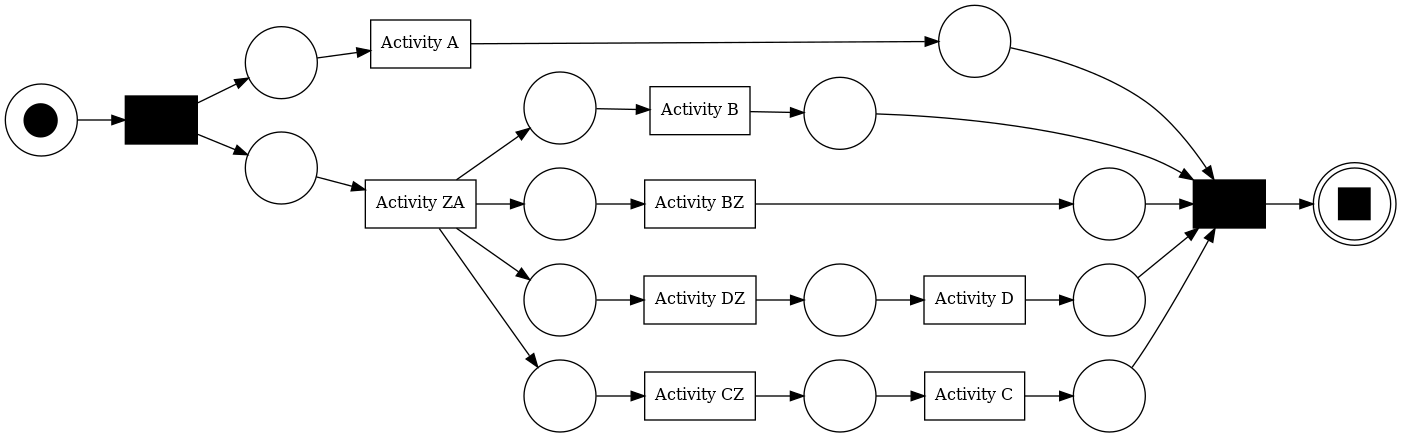

In [5]:
# Directly mined Process model
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(
    df_log_collective,
)
pm4py.view_petri_net(net, initial_marking, final_marking)


/usr/local/lib/python3.12/site-packages/pm4py/objects/petri_net/importer/variants/pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


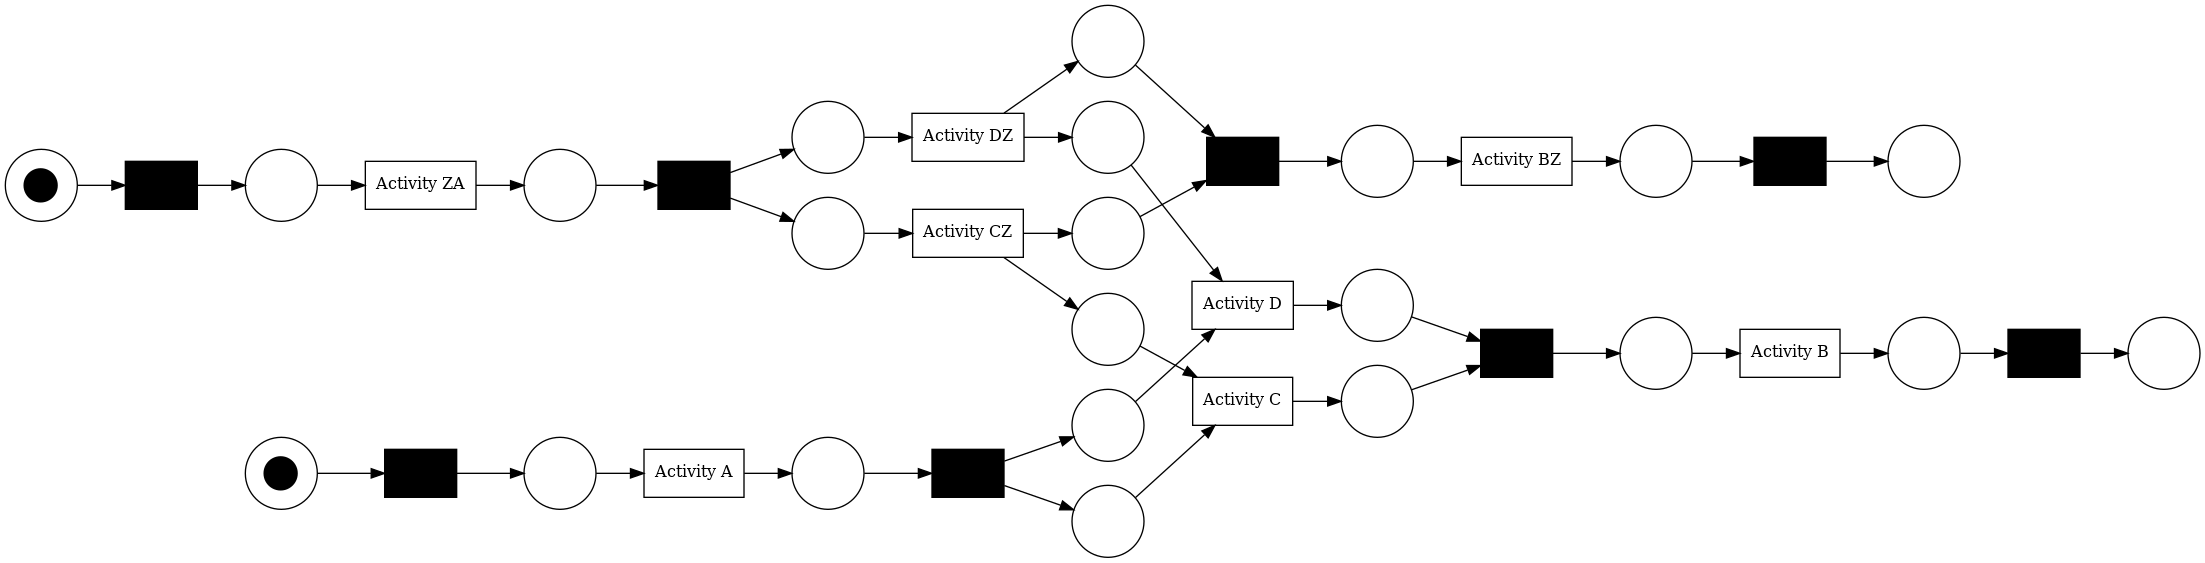

In [6]:
# Their Model
pn_ref_model, initial_marking, final_marking = pm4py.read_pnml(
    "/workspaces/university-petri-nets/backend/data_catalog/colliery_validation/artificial1/petrinet_of_collaboration_discovered_inductive.pnml",
)
pm4py.view_petri_net(pn_ref_model, initial_marking, final_marking)